<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = 'data/chipotle.tsv'

with open(DATA_FILE, mode='rU') as df:   # We temporarily refer to the file by the variable name f for file
    file_nested_list = [row for row in csv.reader(df, delimiter='\t')]

<ipython-input-1-ca7dc0f05cd4>:6: DeprecationWarning: 'U' mode is deprecated
  with open(DATA_FILE, mode='rU') as df:   # We temporarily refer to the file by the variable name f for file


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [2]:
header=file_nested_list[0]
data = file_nested_list[1:]

header

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [3]:
print(type(data))
print (type(data[1]))

print(data[1][4])

<class 'list'>
<class 'list'>
$3.39 


In [4]:
data[1][4][1:]

'3.39 '

In [5]:
prices=[]
for i in data:
    prices.append(i[4])
    
new_prices=[]
for price in prices:
    new_prices.append(float(price.replace('$','')))
    
new_prices[1]

3.39

In [6]:
new_prices2=[float(i[4][1:]) for i in data]

new_prices2[1]

3.39

In [7]:
order_ids=[ i[0] for i in data]

order_id_prices={'Order_Id':order_ids,'Prices':new_prices}

import pandas as pd
order_id_prices_df=pd.DataFrame(order_id_prices)

print(order_id_prices_df.head())

order_id_prices_df.Prices.mean() #doublecounting because duplicated order ids 

  Order_Id  Prices
0        1    2.39
1        1    3.39
2        1    3.39
3        1    2.39
4        2   16.98


7.464335785374397

In [8]:
total_prices=sum(order_id_prices_df.groupby('Order_Id')['Prices'].sum().values)

In [9]:
real_orderid=len(order_id_prices_df.groupby('Order_Id')['Prices'].sum().index)

In [10]:
total_prices/real_orderid

18.811428571428717

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [11]:
c=pd.read_csv(DATA_FILE, sep='\t')
c.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [12]:
set(c[c['item_name'].str.contains('Canned')]['choice_description'])

{'[Coca Cola]',
 '[Coke]',
 '[Diet Coke]',
 '[Diet Dr. Pepper]',
 '[Dr. Pepper]',
 '[Lemonade]',
 '[Mountain Dew]',
 '[Nestea]',
 '[Sprite]'}

In [13]:
soda_name=c[c['item_name'].str.contains('Canned')][['item_name','choice_description']]

In [14]:
soda_name.groupby(['item_name','choice_description'])['choice_description'].count()

item_name          choice_description
Canned Soda        [Coca Cola]            26
                   [Diet Coke]            15
                   [Diet Dr. Pepper]      13
                   [Dr. Pepper]           18
                   [Mountain Dew]         15
                   [Sprite]               17
Canned Soft Drink  [Coke]                102
                   [Diet Coke]            95
                   [Lemonade]             31
                   [Nestea]               18
                   [Sprite]               55
Name: choice_description, dtype: int64

<AxesSubplot:>

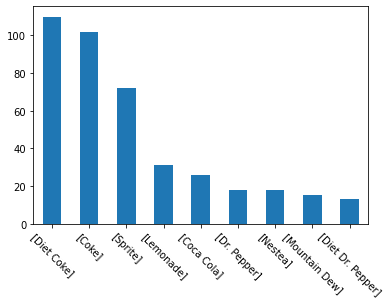

In [15]:
soda_name.choice_description.value_counts().plot(kind='bar',rot=-45)

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [16]:
data[7][2] #itemname

'Steak Burrito'

In [17]:
b_count=0
for i in data:
    if 'urrito' in i[2]:
        b_count+=1
print (b_count)

1172


In [18]:
b_count2=sum(1 for i in data if 'urrito' in i[2])
print(b_count2)

1172


In [19]:
data[7][3]

'[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]'

In [20]:
len(data[7][3].split(','))

8

In [21]:
topping_count=0
for i in data:
    if 'urrito' in i[2]:
        topping_count+=len(i[3].split(','))

print(topping_count)

6323


In [22]:
topping_count2=sum( len(i[3].split(',')) for i in data if 'urrito' in i[2])

print(topping_count2)

6323


In [23]:
topping_count/b_count

5.395051194539249

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [24]:
header

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [25]:
eval(data[3][1])

1

In [26]:
chips_quantity=[ i[1] for i in data if 'Chips' in i[2]]

In [27]:
chips = [i for i in data if 'Chips' in i[2]]

In [30]:
chips_dict = {}

for i in data:
    if 'Chips' in i[2]:
        if i[2] in chips_dict:
            chips_dict[i[2]] += eval(i[1])     
        else:
            chips_dict[i[2]] = eval(i[1])    

chips_dict

{'Chips and Fresh Tomato Salsa': 130,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Side of Chips': 110,
 'Chips and Guacamole': 506,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips': 230,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Chips and Mild Fresh Tomato Salsa': 1}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!
